# Grassmann Manifold

Author: Ketson R. M. dos Santos,  
Date: June 3rd, 2020   

This example shows how to use the UQpy Grassmann class to
* compute kernels;

Import the necessary libraries. Here we import standard libraries such as numpy and matplotlib, but also need to import the Grassmann class from UQpy implemented in the DimensionReduction module.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

from UQpy.DimensionReduction import Grassmann

Generate four random matrices with reduced rank corresponding to the different samples. The samples are stored in `matrices`.

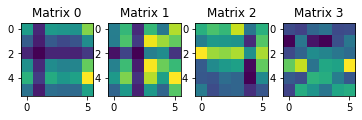

In [2]:
D1 = 6 
r0 = 2  # rank sample 0
r1 = 3  # rank sample 1
r2 = 4  # rank sample 2
r3 = 3  # rank sample 2

np.random.seed(1111) # For reproducibility.
# Solutions: original space.
Sol0 = np.dot(np.random.rand(D1, r0),np.random.rand(r0, D1))
Sol1 = np.dot(np.random.rand(D1, r1),np.random.rand(r1, D1))
Sol2 = np.dot(np.random.rand(D1, r2),np.random.rand(r2, D1))
Sol3 = np.dot(np.random.rand(D1, r3),np.random.rand(r3, D1))

# Creating a list of solutions.
matrices = [Sol0, Sol1, Sol2, Sol3]

# Plot the solutions
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
ax1.title.set_text('Matrix 0')
ax1.imshow(Sol0)
ax2.title.set_text('Matrix 1')
ax2.imshow(Sol1)
ax3.title.set_text('Matrix 2')
ax3.imshow(Sol2)
ax4.title.set_text('Matrix 3')
ax4.imshow(Sol3)
plt.show()

Instatiate the UQpy class Grassmann considering the `projection_kernel` as the a kernel definition on the Grassmann manifold.

In [3]:
Gr = Grassmann(kernel_method=Grassmann.projection_kernel)
Gr.manifold(p="max", samples=matrices)

Compute the kernels for $\Psi$ and $\Phi$, the left and right -singular eigenvectors, respectively, of singular value decomposition of each solution.

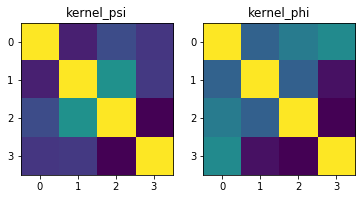

In [4]:
kernel_psi, kernel_phi = Gr.kernel()

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.title.set_text('kernel_psi')
ax1.imshow(kernel_psi)
ax2.title.set_text('kernel_phi')
ax2.imshow(kernel_phi)
plt.show()

Compute the kernel only for 2 points.

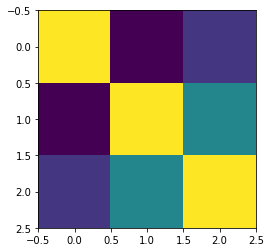

In [5]:
kernel_01 = Gr.kernel(points_grassmann=[Gr.psi[0],Gr.psi[1],Gr.psi[2]])

fig = plt.figure()
plt.imshow(kernel_01)
plt.show()

Compute the kernels for $\Psi$ and $\Phi$, the left and right -singular eigenvectors, respectively, of singular value decomposition of each solution. In this case, use an user defined function `my_kernel`.

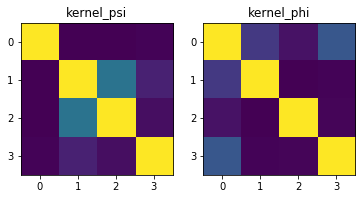

In [6]:
from user_kernel import my_kernel

Gr = Grassmann(kernel_method=my_kernel)
Gr.manifold(p="max", samples=matrices)

kernel_user_psi, kernel_user_phi = Gr.kernel()

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.title.set_text('kernel_psi')
ax1.imshow(kernel_user_psi)
ax2.title.set_text('kernel_phi')
ax2.imshow(kernel_user_phi)
plt.show()